In [1]:
import mne
import numpy as np
import librosa
import os
import pandas as pd

base_path = '/Users/derekrosenzweig/Library/CloudStorage/GoogleDrive-dr2633@stanford.edu/My Drive/EEG-tones/Data/tones-data'

file = f'{base_path}/sub-01-synchronization-test.mff'


# Read in mff data with read_raw_egi
raw = mne.io.read_raw_egi(file)

# Get channel names
channel_names = raw.ch_names
print("\nChannel names:")
print(channel_names)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Reading EGI MFF Header from /Users/derekrosenzweig/Library/CloudStorage/GoogleDrive-dr2633@stanford.edu/My Drive/EEG-tones/Data/tones-data/sub-01-synchronization-test.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...

Channel names:
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E

In [2]:
# Find the trigger channel
trigger_channel_name = 'STI 014'
trigger_channel_index = channel_names.index(trigger_channel_name)
print(f"\nTrigger channel '{trigger_channel_name}' found at index:", trigger_channel_index)

# Find the reference channel
reference_channel_name = 'VREF'
reference_channel_index = channel_names.index(reference_channel_name)
print(f"\nReference channel '{reference_channel_name}' found at index:", reference_channel_index)

# Extract EEG data
eeg_data = raw.get_data()


Trigger channel 'STI 014' found at index: 131

Reference channel 'VREF' found at index: 128


In [3]:
# Print shape of EEG data
print("\nShape of EEG data:", np.shape(eeg_data))

# Access trigger channel data
trigger_channel_data = eeg_data[trigger_channel_index, :]

# Find events for channel 1 only
events = mne.find_events(raw, stim_channel=trigger_channel_name)

# Filter events where the third column is equal to 1
events_channel_1 = events[events[:, 2] == 1]

# Get the sample rate
sample_rate = raw.info['sfreq']
print(f"\nSample rate: {sample_rate} Hz")

# Print info
print("\nRaw info:")
print(raw.info)

events[:]


Shape of EEG data: (132, 348673)
689 events found on stim channel STI 014
Event IDs: [1 2]

Sample rate: 500.0 Hz

Raw info:
<Info | 10 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG, 3 Stimulus
 custom_ref_applied: False
 device_info: 1 item (dict)
 dig: 132 items (3 Cardinal, 129 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2024-08-19 00:24:36 UTC
 nchan: 132
 projs: []
 sfreq: 500.0 Hz
 utc_offset: -0700
>


array([[  1909,      0,      1],
       [  2409,      0,      1],
       [  2909,      0,      1],
       ...,
       [345406,      0,      1],
       [345906,      0,      1],
       [346406,      0,      1]])

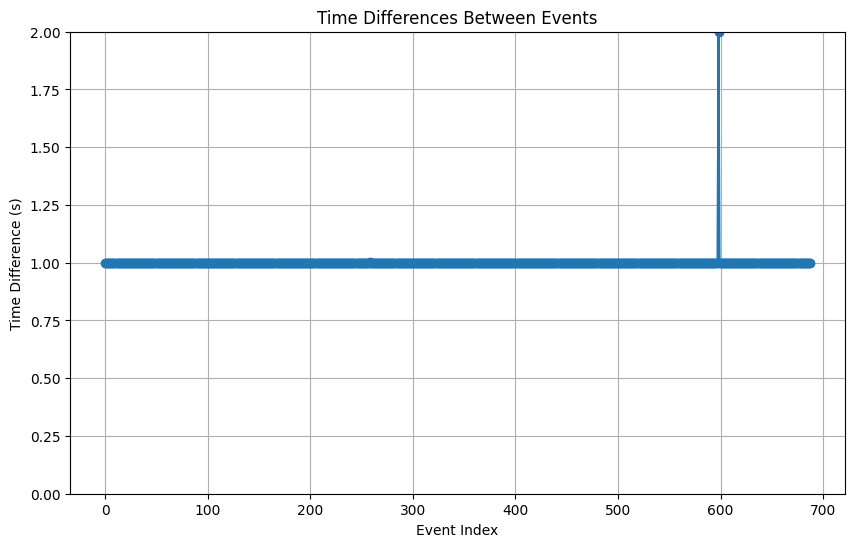

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the time differences between consecutive events
event_times = events[:, 0] / sample_rate  # Convert sample indices to time (in seconds)
time_differences = np.diff(event_times)

# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(time_differences, marker='o')
plt.title('Time Differences Between Events')
plt.xlabel('Event Index')
plt.ylabel('Time Difference (s)')
plt.ylim(0, 2)  # Set y-axis limit from 0 to 2 seconds
plt.grid(True)
plt.show()


Reading EGI MFF Header from /Users/derekrosenzweig/Library/CloudStorage/GoogleDrive-dr2633@stanford.edu/My Drive/EEG-tones/Data/tones-data/sub-01-synchronization-test.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 348672  =      0.000 ...   697.344 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Bad channels identified: []
Setting channel interpolation method to {'eeg': 'spline'}.
689 events found on stim channel STI 014
Event IDs: [1 2]
Not setting metadata
498 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 498 events and 351 original time points ...
0 bad epochs dropped
No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/k2/2786kgx974vf04xkmg2tpfhr0000gr/T/ipykernel_15193/3528163853.py:37: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads()


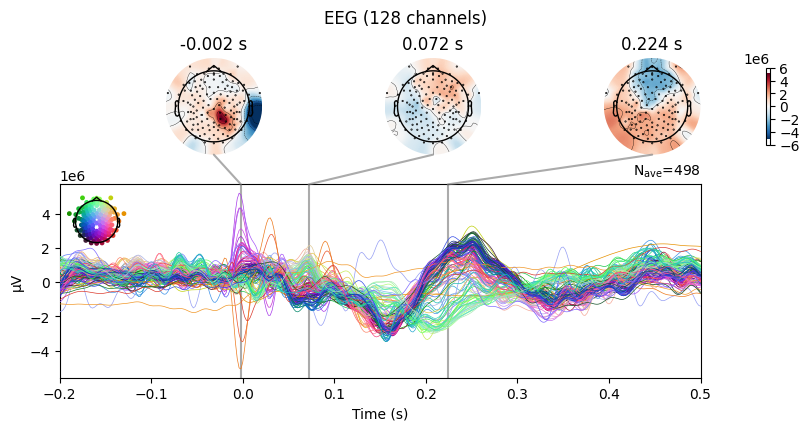

In [12]:
import mne
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load the EEG data with preload=True to load it into memory
raw = mne.io.read_raw_egi(file, preload=True)

# Set 'VREF' as the reference electrode
raw.set_eeg_reference(ref_channels=['VREF'])

# 1. Filtering
# Apply a bandpass filter to remove noise (e.g., 1-40 Hz)
raw.filter(l_freq=1.0, h_freq=40.0)

# 2. Z-scoring the data
data = raw.get_data()  # Get the EEG data
zscored_data = zscore(data, axis=0)  # Z-score across time for each electrode

# 3. Bad Channel Identification and Interpolation using Z-scored data
# Calculate mean and standard deviation across all electrodes (after z-scoring)
mean_data = np.mean(zscored_data, axis=1)  # Mean should be near 0 after z-scoring
std_data = np.std(zscored_data, axis=1)  # Std should be near 1 after z-scoring

# Define threshold for identifying bad electrodes (e.g., 5 SD)
threshold = 5  # Using 5 SD as the threshold in z-scored data

# Find indices of electrodes exceeding the threshold
bad_indices = np.where(np.abs(mean_data) > threshold)[0]

# Convert indices to channel names
bad_channels = [raw.ch_names[idx] for idx in bad_indices]
print(f"Bad channels identified: {bad_channels}")

# Interpolate bad electrodes
raw.info['bads'] = bad_channels
raw.interpolate_bads()

# 4. Epoching
events = mne.find_events(raw)

# Select only the first 500 events
events = events[:500]

# Define epoch parameters (e.g., -0.2 to 0.5 seconds around events)
tmin = -0.2
tmax = 0.5
epochs = mne.Epochs(raw, events, event_id=1, tmin=tmin, tmax=tmax, baseline=(None, 0), preload=True)

# Drop specified channels after epoching
channels_to_remove = ['VREF', 'DIN1', 'DIN2', 'STI 014']
epochs.drop_channels(channels_to_remove)

# Calculate the evoked response
evoked = epochs.average()

# Z-score the evoked data
evoked._data = zscore(evoked._data, axis=1)

# Plot the evoked response
fig = evoked.plot_joint()

# Add a dashed grey line at t = 0
for ax in fig.axes:
    ax.axvline(x=0, color='grey', linestyle='--', linewidth=1.5)

plt.show()
